# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

## 1. Insumos

### 1.1 Carga de librerias, accesos y bases

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.mixture import GaussianMixture 
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn import metrics


In [2]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls -al

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/1_Datasets
total 15527
-rw------- 1 root root 8934363 Apr 17 19:16 1.1_input_dataset.csv
-rw------- 1 root root 1926620 Apr 24 00:22 1.2_sample_dataset.csv
-rw------- 1 root root 1408773 Apr 24 00:24 1.3_clean_dataset.csv
-rw------- 1 root root 1435591 Apr 24 00:29 1.4_cluster_dataset.csv
-rw------- 1 root root 2193608 Apr 24 02:03 1.5_encoding_dataset.csv


In [3]:
df = pd.read_csv('1.5_encoding_dataset.csv', index_col=0)

In [4]:
df.head(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster,NAP
0,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,4.42,352,244,2003,2,harri potter chamber secret harri potter 2 jk ...
1,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,3.79,152,1,2005,0,unauthor harri potter book seven news halfbloo...
2,0767910435,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,Broadway Books,3.88,256,131,2004,1,bryson dictionari troublesom word writer guid ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13405 entries, 0 to 13404
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            13405 non-null  object 
 1   Name            13405 non-null  object 
 2   Authors         13405 non-null  object 
 3   Publisher       13405 non-null  object 
 4   Rating          13405 non-null  float64
 5   pagesNumber     13405 non-null  int64  
 6   CountsOfReview  13405 non-null  int64  
 7   PublishYear     13405 non-null  int64  
 8   Cluster         13405 non-null  int64  
 9   NAP             13405 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.1+ MB


### 1.2 Vectorización de variable trasnformada

In [6]:
vec_df = CountVectorizer()
vec_df = vec_df.fit_transform(df['NAP'])
vec_df.shape

(13405, 16539)

In [7]:
sem_df = cosine_similarity(vec_df,vec_df)
sem_df.shape

(13405, 13405)

In [8]:
def orden_semejanza(ISBN):
    ind_sem = pd.Series(df.index, index=df['ISBN']).drop_duplicates()
    ind_sem = ind_sem[ISBN]

    sem = list(enumerate(sem_df[ind_sem]))
    sem = sorted(sem, key=lambda orden: orden[1], reverse=True)
   
    mask = [i[0] for i in sem]
    return df.iloc[mask].drop(columns = ['NAP'])

### 1.3 Instantanea

In [9]:
ISBN = '0393020398'

In [10]:
consulta = orden_semejanza(ISBN)
consulta.head(11)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
463,0393020398,The Annotated Huckleberry Finn,Mark Twain,W. W. Norton Company,3.82,656,19,2001,3
2914,0764587277,Mark Twain's Adventures of Huckleberry Finn,Mark Twain,Hungry Minds,3.82,264,0,2001,1
466,0060955422,The Autobiography of Mark Twain,Mark Twain,Harper Perennial,4.05,508,209,2000,3
5607,0517053578,Mark Twain: Selected Works,Mark Twain,Gramercy,4.23,690,1,1990,3
464,0486406644,The Wit and Wisdom of Mark Twain,Mark Twain,Dover Publications,4.20,64,54,1998,0
3684,0451528646,The Adventures of Tom Sawyer and Adventures of...,Mark Twain,Signet Classics,4.08,520,455,2002,2
794,0393051587,The Annotated Christmas Carol,Charles Dickens,W. W. Norton Company,4.05,266,46,2004,1
3587,0393057240,"Trainspotting (Mark Renton, #2)",Irvine Welsh,W. W. Norton Company,4.09,340,46,2002,1
461,0520238958,Huck Finn & Tom Sawyer among the Indians & Oth...,Mark Twain,University of California Press,3.90,389,0,2003,1
13307,0812971183,The Best Short Stories of Mark Twain,Mark Twain,Modern Library,4.11,400,48,2004,1


In [11]:
consulta = consulta.reset_index()
consulta.head(3)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
0,463,0393020398,The Annotated Huckleberry Finn,Mark Twain,W. W. Norton Company,3.82,656,19,2001,3
1,2914,0764587277,Mark Twain's Adventures of Huckleberry Finn,Mark Twain,Hungry Minds,3.82,264,0,2001,1
2,466,0060955422,The Autobiography of Mark Twain,Mark Twain,Harper Perennial,4.05,508,209,2000,3


In [12]:
consulta = consulta.drop(columns= ['index','Cluster'])
consulta.head(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0393020398,The Annotated Huckleberry Finn,Mark Twain,W. W. Norton Company,3.82,656,19,2001
1,0764587277,Mark Twain's Adventures of Huckleberry Finn,Mark Twain,Hungry Minds,3.82,264,0,2001
2,0060955422,The Autobiography of Mark Twain,Mark Twain,Harper Perennial,4.05,508,209,2000


In [13]:
consulta = consulta.reset_index()
consulta.head(3)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0,0393020398,The Annotated Huckleberry Finn,Mark Twain,W. W. Norton Company,3.82,656,19,2001
1,1,0764587277,Mark Twain's Adventures of Huckleberry Finn,Mark Twain,Hungry Minds,3.82,264,0,2001
2,2,0060955422,The Autobiography of Mark Twain,Mark Twain,Harper Perennial,4.05,508,209,2000


___
___

## 2 Pre-procesamiento

### 2.1 Normalización de variables numericas

In [14]:
num_df = consulta[list(consulta.columns[consulta.dtypes != object])]
num_df.head(3)

,index,Rating,pagesNumber,CountsOfReview,PublishYear
0,0,3.82,656,19,2001
1,1,3.82,264,0,2001
2,2,4.05,508,209,2000


In [15]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(num_df)
scaled_df

array([[-1.7319216 , -0.44809912,  2.49846826, -0.57543414,  0.01655725],
       [-1.73166318, -0.44809912, -0.17139257, -0.76043421,  0.01655725],
       [-1.73140477,  0.4276508 ,  1.49045958,  1.27456653, -0.16477439],
       ...,
       [ 1.73140477, -0.29579478,  0.53693785,  2.04377734, -0.16477439],
       [ 1.73166318, -1.74268595, -1.96946211, -0.76043421,  0.19788888],
       [ 1.7319216 , -0.44809912, -0.11690561, -0.71174998,  0.01655725]])

In [16]:
normalized_df = normalize(scaled_df) 
normalized_df

array([[-0.55397494, -0.14332963,  0.79916366, -0.18405919,  0.00529603],
       [-0.88746545, -0.22964771, -0.08783751, -0.38971729,  0.00848548],
       [-0.65190965,  0.16101936,  0.56118881,  0.47990062, -0.06204096],
       ...,
       [ 0.62896848, -0.10745355,  0.19505375,  0.74244426, -0.05985769],
       [ 0.53359513, -0.53699169, -0.60687055, -0.23432039,  0.06097753],
       [ 0.89785401, -0.23230127, -0.06060562, -0.36898181,  0.00858353]])

In [17]:
# ['Ordering', 'Rating', 'pagesNumber', 'CountsOfReview', 'PublishYear']
nor_df = pd.DataFrame(normalized_df)
nor_df.head(3)

,0,1,2,3,4
0,-0.553975,-0.143330,0.799164,-0.184059,0.005296
1,-0.887465,-0.229648,-0.087838,-0.389717,0.008485
2,-0.651910,0.161019,0.561189,0.479901,-0.062041


In [18]:
nor_df.shape

(13405, 5)

___

### 2.2 PCA incremental

In [19]:
ipca = IncrementalPCA(n_components=nor_df.shape[1])
ipca.fit(nor_df)

IncrementalPCA(n_components=5)

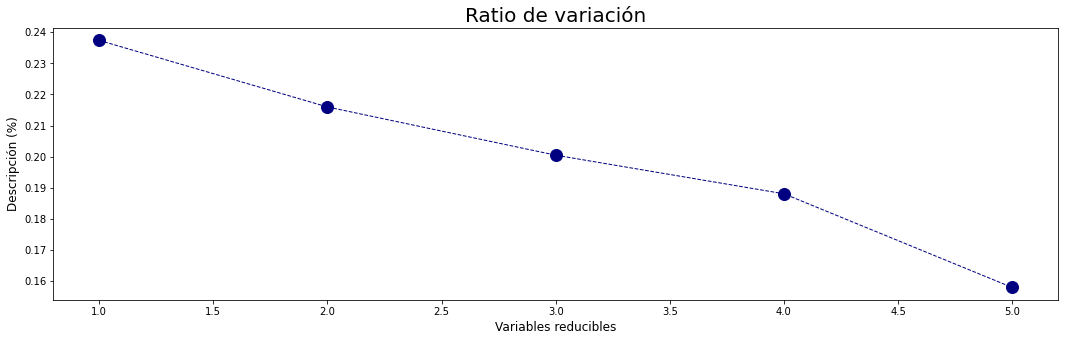

In [22]:
plt.figure(figsize=(18, 5))

plt.title("Ratio de variación", size = 20)
plt.xlabel("Variables reducibles", size = 12,)
plt.ylabel("Descripción (%)", size = 12)

plt.plot(range(1, len(ipca.explained_variance_) + 1), ipca.explained_variance_ratio_, color="navy", marker='o', linestyle='dashed', linewidth=1, markersize=12)

In [23]:
ipca.explained_variance_ratio_[0:4].sum()

0.8419825922647144

In [36]:
ipca = IncrementalPCA(n_components=4)
ipca_df = ipca.fit_transform(nor_df)
# ipca_df = pd.DataFrame(ipca_df)
# ipca_df.head()

___

## 3 Clustering a posteriori

### 3.1 Número de clusters

In [28]:
dbs = DBSCAN(eps=3, min_samples=4, metric='euclidean')

In [29]:
dbs = dbs.fit(ipca_df)
clusters = dbs.labels_

In [30]:
sample_cores=np.zeros_like(clusters, dtype=bool)
sample_cores[dbs.core_sample_indices_]=True

In [32]:
n_clusters = len(set(clusters))- (1 if -1 in clusters else 0)
n_clusters

1

### 3.2 Conclusiones

In [33]:
marcado = dbs.fit_predict(ipca_df)

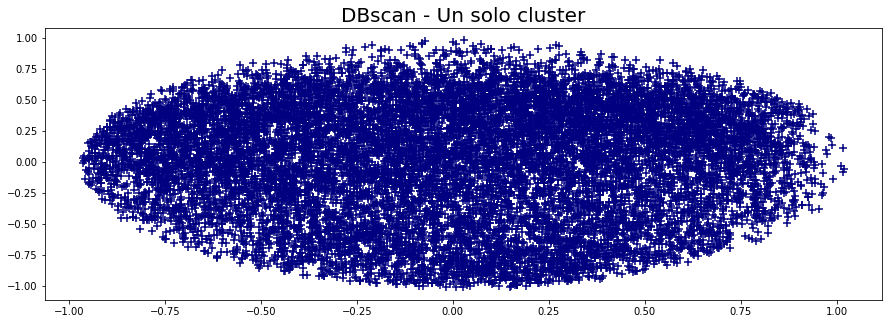

In [37]:
plt.figure(figsize=(15, 5))
plt.scatter(ipca_df[marcado == 0, 0], ipca_df[marcado == 0, 1], s = 50, color='navy', marker="+")
plt.title('DBscan - Un solo cluster', size = 20)
plt.show()

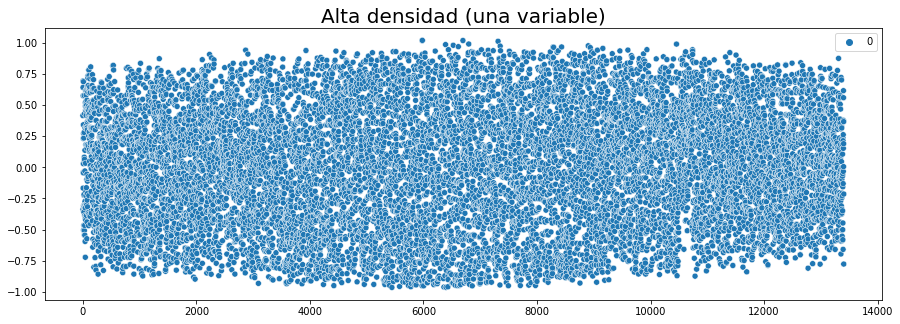

In [39]:
rank = pd.DataFrame(ipca_df)

plt.figure(1, figsize = (15 , 5))
plt.title('Alta densidad (una variable)', size = 20)
sns.scatterplot(data=rank[[0]])

 
> El modelo híbrido que creaste al final del módulo cuatro es el mejor, presenta el desempeño más alto en las pruebas objetivas y subjetivas; el tratamiento de las variables categóricas y numéricas fue el siguientes:
 
* **Semejanza**. A partir del nombre del libro, el autor y la editorial, creaste un índice por similitud vectorial coseno; construcción a partir del conteo de palabras clave y procesamiento de lenguaje natural, esta característica describe casi en su totalidad a los datos.
 
* **Distancia**. Clásica (o euclidiana) entre observaciones con un proceso de clustering GMM de 3 segmentos (derivado a la alta densidad), aplicación sobre el índice de semejanza y el rating del libro. 

> Pruebas experimentales necesarias para la construcción del modelo final (lecciones aprendidas). 
*   Clustering por Kmean previo al índice de semejanza: Las recomendaciones no mejoran el indexado dentro del cluster (pruebas subjetivas). 
*   Reducción de variables por el método PCA/IPCA: De 5 variables originales, se redujo a 4 con +84% de descripción.
*   Clustering por método DBScan por alta densidad en datos normalizados: Solo propone un cluster para todos los datos por lo que no hay aporte al modelo.

___
___